In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

salesdata=pd.read_csv('./AusApparalSales4thQrt2020.csv')
salesdata

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,30-Dec-2020,Afternoon,TAS,Seniors,14,35000
7556,30-Dec-2020,Evening,TAS,Kids,15,37500
7557,30-Dec-2020,Evening,TAS,Men,15,37500
7558,30-Dec-2020,Evening,TAS,Women,11,27500


1.	Data wrangling

In [75]:
###Inspect the data manually to identify missing or incorrect information using the functions isna() and notna()

if salesdata.isna().any().any():
    print("DataFrame has null values in the following columns:")
    print(salesdata.isna().sum()[salesdata.isna().sum() > 0])
else:
    print("No null values in DataFrame.")


No null values in DataFrame.


In [76]:
###Based on your knowledge of data analytics, include your recommendations for treating missing and incorrect data (dropping the null values or filling them)

if salesdata.isna().any().any():
    print("DataFrame has null values in the following columns which need an action:")
    print(salesdata.isna().sum()[salesdata.isna().sum() > 0])
else:
    print("No null values in DataFrame. So no action needed")

No null values in DataFrame. So no action needed


In [77]:
###
salesdata.info()
salesdata['Date']=pd.to_datetime(salesdata['Date']) #this will covert the data column to datetime64 data type for easy processing of data
print("updated data type details\n")
salesdata.info()

from sklearn.preprocessing import MinMaxScaler , StandardScaler

scaler_minmax=MinMaxScaler()
salesdata[['scaled_Unit','scaled_Sales']]=scaler_minmax.fit_transform(salesdata[['Unit','Sales']])
print('the minmax scaled "Unit", "Sales" column is added\n')
salesdata



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB
updated data type details

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 354.5+ K

,Date,Time,State,Group,Unit,Sales,scaled_Unit,scaled_Sales
0,2020-10-01,Morning,WA,Kids,8,20000,0.095238,0.095238
1,2020-10-01,Morning,WA,Men,8,20000,0.095238,0.095238
2,2020-10-01,Morning,WA,Women,4,10000,0.031746,0.031746
3,2020-10-01,Morning,WA,Seniors,15,37500,0.206349,0.206349
4,2020-10-01,Afternoon,WA,Kids,3,7500,0.015873,0.015873
...,...,...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000,0.190476,0.190476
7556,2020-12-30,Evening,TAS,Kids,15,37500,0.206349,0.206349
7557,2020-12-30,Evening,TAS,Men,15,37500,0.206349,0.206349
7558,2020-12-30,Evening,TAS,Women,11,27500,0.142857,0.142857


           Date        Time State     Group  Unit  Sales  scaled_Unit  \
0    2020-10-01     Morning    WA      Kids     8  20000     0.095238   
1    2020-10-01     Morning    WA       Men     8  20000     0.095238   
2    2020-10-01     Morning    WA     Women     4  10000     0.031746   
3    2020-10-01     Morning    WA   Seniors    15  37500     0.206349   
4    2020-10-01   Afternoon    WA      Kids     3   7500     0.015873   
...         ...         ...   ...       ...   ...    ...          ...   
7555 2020-12-30   Afternoon   TAS   Seniors    14  35000     0.190476   
7556 2020-12-30     Evening   TAS      Kids    15  37500     0.206349   
7557 2020-12-30     Evening   TAS       Men    15  37500     0.206349   
7558 2020-12-30     Evening   TAS     Women    11  27500     0.142857   
7559 2020-12-30     Evening   TAS   Seniors    13  32500     0.174603   

      scaled_Sales  std_Unit  std_Sales  
0         0.095238 -0.775581  -0.775581  
1         0.095238 -0.775581  -0.775581

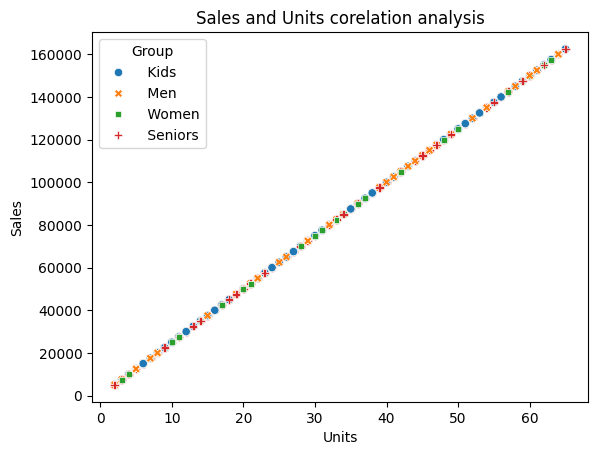

In [78]:
scaler_std=StandardScaler()
salesdata[['std_Unit','std_Sales']]=scaler_std.fit_transform(salesdata[['Unit','Sales']])
print(salesdata)

correlation = salesdata[['Sales', 'Unit']].corr()
print(correlation)

sns.scatterplot(data=salesdata,x="Unit",y="Sales",hue="Group",style="Group")
plt.title("Sales and Units corelation analysis")
plt.xlabel("Units")
plt.ylabel("Sales")
plt.show()

The above analysis and visualization both pointing Unit and Sales are strongly corelated. when units increase then sales increase..

In [79]:
max_revenue_state=salesdata.groupby("State")["Sales"].sum().idxmax()
max_revenue_value=salesdata.groupby("State")["Sales"].sum().max()
min_revenue_state=salesdata.groupby("State")[["Unit","Sales"]].sum().idxmin()
min_revenue=salesdata.groupby("State")[["Unit","Sales"]].sum().min()
print("Group the Unit and sales data based on states and sum it out\n")
print(salesdata.groupby("State")[["Unit","Sales"]].sum(),"\n")

print("The maxumum revenue achieved by the sate", max_revenue_state ," and the over all revenue is ", max_revenue_value )

print("The Min revenue performed by the sate", min_revenue_state ['Sales'] ,"which need a some developement. The overall value is", min_revenue['Sales'])

Group the Unit and sales data based on states and sum it out

        Unit      Sales
State                  
 NSW   29988   74970000
 NT     9032   22580000
 QLD   13367   33417500
 SA    23543   58857500
 TAS    9104   22760000
 VIC   42226  105565000
 WA     8861   22152500 

The maxumum revenue achieved by the sate  VIC  and the over all revenue is  105565000
The Min revenue performed by the sate  WA which need a some developement. The overall value is 22152500


2.	Data analysis

Some descriptive analysis at high level for the sales data which is given below 

count      7560.000000
mean      45013.558201
std       32253.506944
min        5000.000000
25%       20000.000000
50%       35000.000000
75%       65000.000000
max      162500.000000
Name: Sales, dtype: float64
median	 35000.0
mode	 0    22500
Name: Sales, dtype: int64


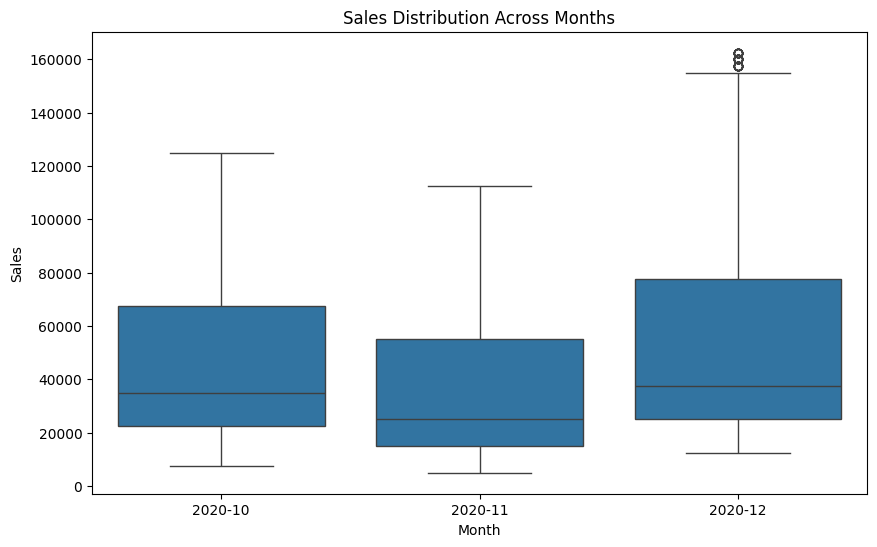

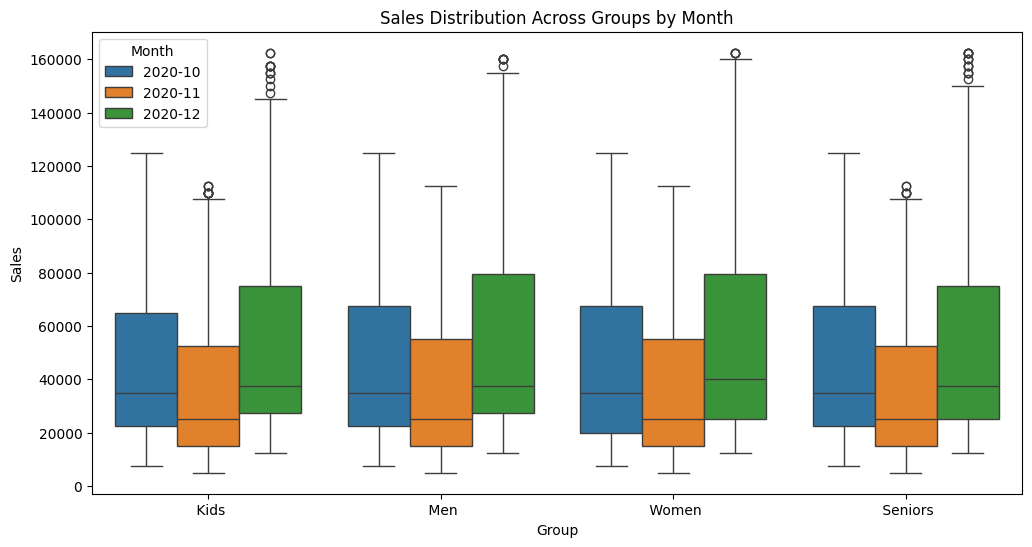

In [91]:
print("Some descriptive analysis at high level for the sales data which is given below \n")
print(salesdata['Sales'].describe())
print("median\t",salesdata['Sales'].median())
print("mode\t",salesdata['Sales'].mode())


salesdata['Month'] = salesdata['Date'].dt.to_period('M')

plt.figure(figsize=(10,6))
sns.boxplot(data=salesdata, x="Month", y="Sales")
plt.title("Sales Distribution Across Months")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(data=salesdata, x="Group", y="Sales", hue=salesdata['Date'].dt.to_period('M'))
plt.title("Sales Distribution Across Groups by Month")
plt.xlabel("Group")
plt.ylabel("Sales")
plt.legend(title="Month")
plt.show()



The above visualization pointing that sales having more positive outlier more at the December month regardless of groups.

The maxumum revenue achieved by the sate  VIC  and the over all revenue is  105565000
The Min revenue performed by the sate  WA The overall revenue is 22152500


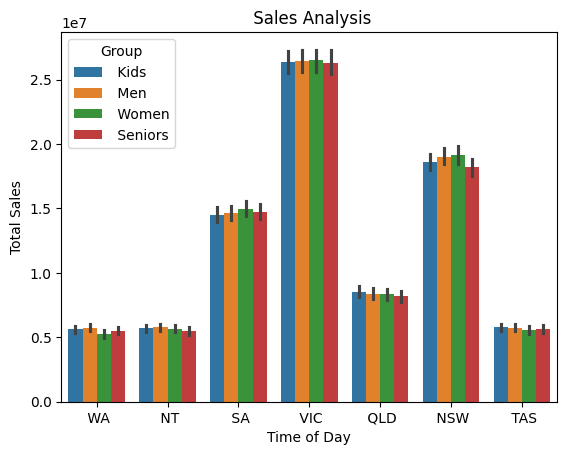

In [81]:
###b.	Identify the group with the highest sales and the group with the lowest sales based on the data provided.

max_revenue_state=salesdata.groupby("State")["Sales"].sum().idxmax()
max_revenue_value=salesdata.groupby("State")["Sales"].sum().max()
min_revenue_state=salesdata.groupby("State")[["Unit","Sales"]].sum().idxmin()
min_revenue=salesdata.groupby("State")[["Unit","Sales"]].sum().min()

print("The maxumum revenue achieved by the sate", max_revenue_state ," and the over all revenue is ", max_revenue_value )

print("The Min revenue performed by the sate", min_revenue_state ['Sales'] ,"The overall revenue is", min_revenue['Sales'])


sns.barplot(
    data=salesdata,
    x="State",
    y="Sales",
    estimator="sum",   # total sales per time bucket
    hue="Group"
)
plt.title(" Sales Analysis")
plt.xlabel("Time of Day")
plt.ylabel("Total Sales")
plt.show()

According to above Bar plot the VIC and NSW have the high revenue where we can introduced more products and other states we need to increase the sales by intrdocuing the offer on exisitng products.. 

Dont see much difference b/w groups in each state.. but can retrive more hiden facts in next histogram based state wise and group wise analysis.

In [82]:
print("per week sales data is\n")
print(salesdata.groupby(pd.Grouper(key="Date", freq="W"))["Sales"].sum())

print("per Month sales data is\n")
print(salesdata.groupby(pd.Grouper(key="Date", freq="M"))["Sales"].sum())

print("per Quarter sales data is\n")
print(salesdata.groupby(pd.Grouper(key="Date", freq="Q"))["Sales"].sum())

per week sales data is

Date
2020-10-04    15045000
2020-10-11    27002500
2020-10-18    26640000
2020-10-25    26815000
2020-11-01    21807500
2020-11-08    20865000
2020-11-15    21172500
2020-11-22    21112500
2020-11-29    21477500
2020-12-06    29622500
2020-12-13    31525000
2020-12-20    31655000
2020-12-27    31770000
2021-01-03    13792500
Freq: W-SUN, Name: Sales, dtype: int64
per Month sales data is

Date
2020-10-31    114290000
2020-11-30     90682500
2020-12-31    135330000
Freq: M, Name: Sales, dtype: int64
per Quarter sales data is

Date
2020-12-31    340302500
Freq: Q-DEC, Name: Sales, dtype: int64


3.	Data visualization

Text(0.5, 0.98, 'State-wise Sales Analysis Across Demographic Groups')

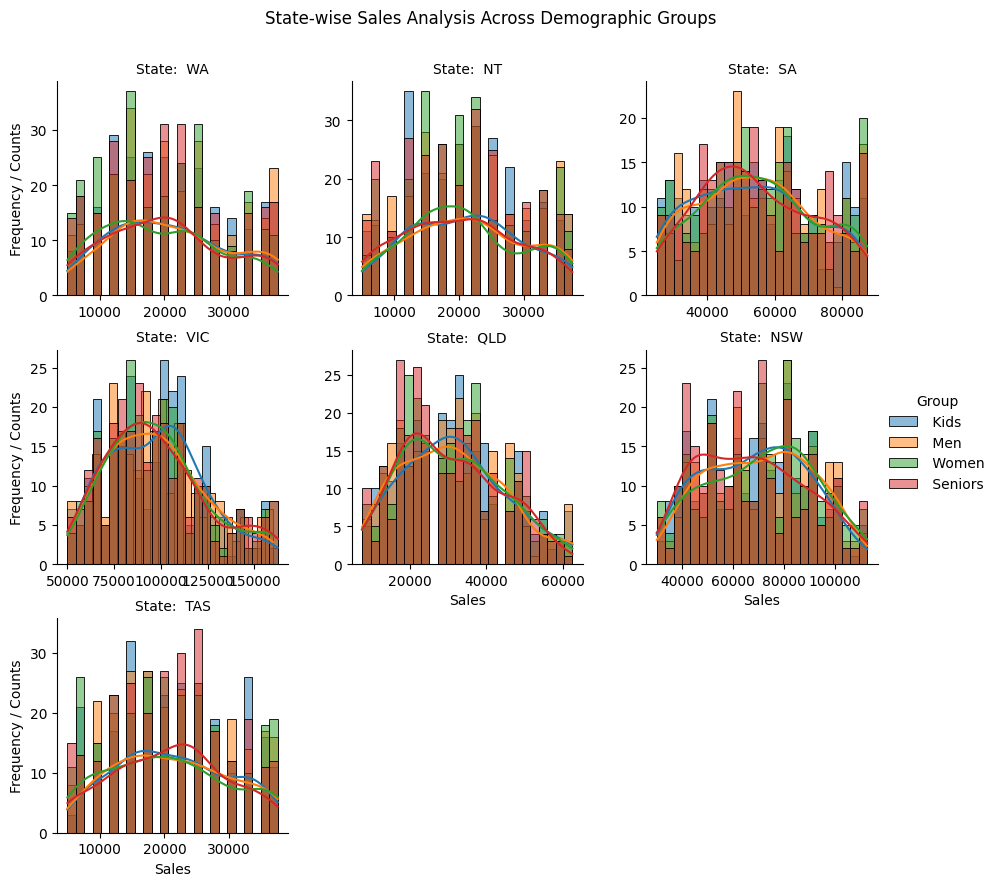

In [83]:
g = sns.FacetGrid(
    salesdata,
    col="State",
    hue="Group",
    col_wrap=3,   # number of plots per row
    sharex=False,
    sharey=False
)
g.map(sns.histplot, "Sales", multiple="dodge", kde=True, bins=25)
g.add_legend()
g.set_axis_labels("Sales", "Frequency / Counts")
g.set_titles("State: {col_name}")
plt.subplots_adjust(top=0.9)   # leave room at top
g.fig.suptitle("State-wise Sales Analysis Across Demographic Groups")


Text(0.5, 0.98, 'Demographic Group-wise Sales Analysis Across States')

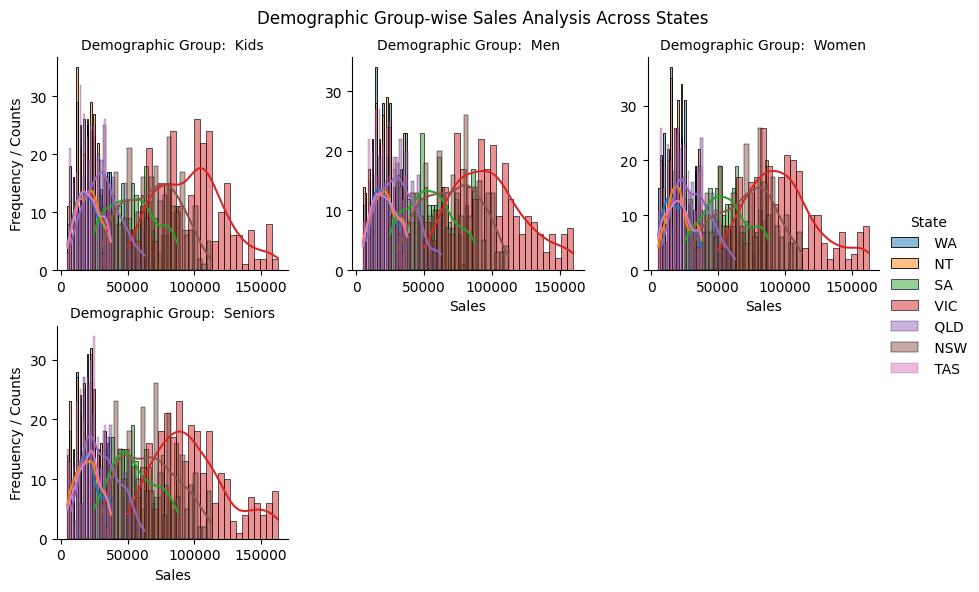

In [84]:
g = sns.FacetGrid(
    salesdata,
    col="Group",
    hue="State",
    col_wrap=3,   # number of plots per row
    sharex=False,
    sharey=False
)
g.map(sns.histplot, "Sales", multiple="dodge", kde=True, bins=25)
g.add_legend()
g.set_axis_labels("Sales", "Frequency / Counts")
g.set_titles("Demographic Group: {col_name}")
plt.subplots_adjust(top=0.9)   # leave room at top
g.fig.suptitle("Demographic Group-wise Sales Analysis Across States")

There are 2 dasboard above which i have used histogram to understand how the states and group wise contributions are distributed..

Distribution of sales amounts differs by group:

Seniors are concentrated more at lower sales in VIC, QLD,SA and NSW where the kids are at higher values in NSW,VIC,QLD. But in TAS its inverse..

So we can have the offer or campaign accordingly to increase the sale of lower candidates.

VIC and QLD states are having more positive ouliers as its right skewed 


Comparison across states:

NSW and VIC (thicker brown and red curves) dominate at higher sales values — these states generate larger sales.

Smaller states (NT, TAS, SA, etc.) cluster more on the left (smaller transactions, lower sales).

Variation between demographic groups:

Seniors and Kids show more modest spending patterns (steeper histograms, clustered at lower values).

Women and Men show more gradual distributions, extending into higher sales brackets — possibly meaning higher-value purchases.

Strategic implications:

NSW & VIC are top-performing states across all demographics — expansion could focus on consolidating dominance here.

Low-revenue states (NT, WA, TAS) show weak curves → candidates for targeted campaigns.

Group targeting: If Senior’ spending is weaker, maybe Senior’ product lines need rethinking or more aggressive promotions on respective states.

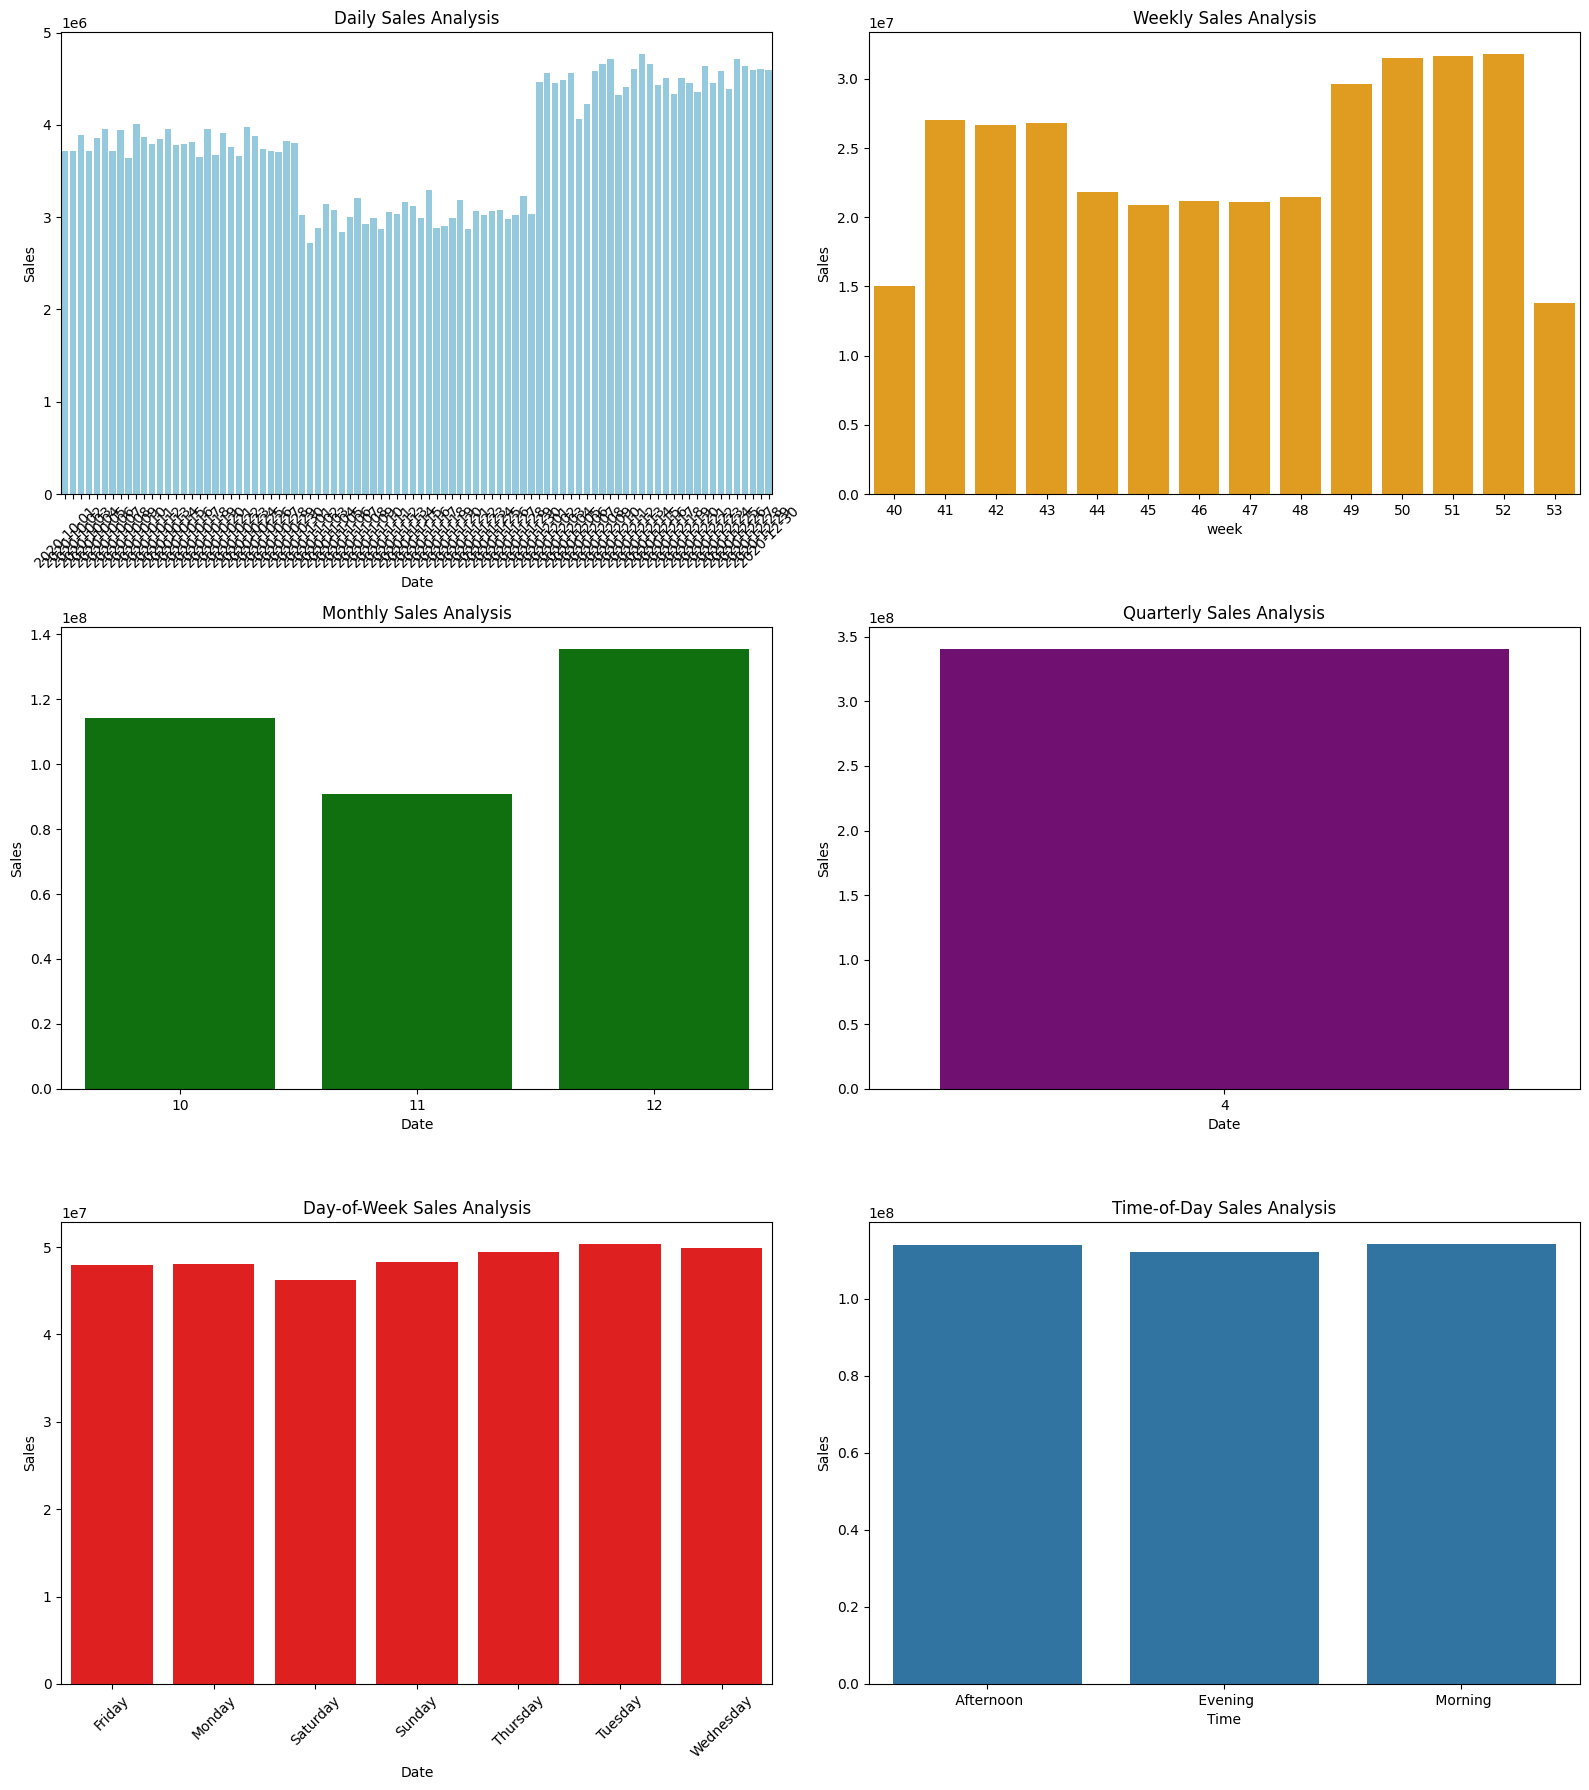

In [85]:
# Set up the subplot grid (3 rows × 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(16, 18))  # Adjust size as needed
axes = axes.flatten()  # Flatten into 1D array for easy indexing

# ----------------------
# 1. Daily Sales
sns.barplot(
    data=salesdata.groupby(salesdata['Date'].dt.date)['Sales'].sum().reset_index(),
    x="Date", y="Sales", ax=axes[0], color="skyblue"
)
axes[0].set_title("Daily Sales Analysis")
axes[0].tick_params(axis='x', rotation=45)

# ----------------------
# 2. Weekly Sales
sns.barplot(
    data=salesdata.groupby(salesdata['Date'].dt.isocalendar().week)['Sales'].sum().reset_index(),
    x="week", y="Sales", ax=axes[1], color="orange"
)
axes[1].set_title("Weekly Sales Analysis")

# ----------------------
# 3. Monthly Sales
sns.barplot(
    data=salesdata.groupby(salesdata['Date'].dt.month)['Sales'].sum().reset_index(),
    x="Date", y="Sales", ax=axes[2], color="green"
)
axes[2].set_title("Monthly Sales Analysis")

# ----------------------
# 4. Quarterly Sales
sns.barplot(
    data=salesdata.groupby(salesdata['Date'].dt.quarter)['Sales'].sum().reset_index(),
    x="Date", y="Sales", ax=axes[3], color="purple"
)
axes[3].set_title("Quarterly Sales Analysis")

# ----------------------
# 5. Day-of-Week Sales
sns.barplot(
    data=salesdata.groupby(salesdata['Date'].dt.day_name())['Sales'].sum().reset_index(),
    x="Date", y="Sales", ax=axes[4], color="red"
)
axes[4].set_title("Day-of-Week Sales Analysis")
axes[4].tick_params(axis='x', rotation=45)

# ----------------------
# 6. Time-of-Day Sales
sns.barplot(
    data=salesdata.groupby('Time')['Sales'].sum().reset_index(),
    x="Time", y="Sales", ax=axes[5]
)
axes[5].set_title("Time-of-Day Sales Analysis")

# ----------------------
# Adjust layout
plt.tight_layout()
plt.show()

Time of dayday analysis i have picked up the Bar plot which will help to identify the facts about the peak and off peak windows easily

1. Time-of-Day Analysis

Insight: Sales are fairly balanced across Morning, Afternoon, and Evening, with a slight edge in Afternoon/Morning.

Use case: Helps decide staffing levels or promotional timing (e.g., run flash offers in afternoons).

2. Weekly Analysis

Insight: It shows that 1st week of the month reporting low sale then its pickup for other weeks.. so would be good to have the inventory planned accordingly

3. Monthly Analysis

Insights: Shows seasonality and growth trends like December Month reporting high sales.. But do see low sales at october..

4. Day-of-Week Analysis

Insights: Noticing drop in week end sales compare to week days.. Saturday is reporting low sales. Good to have the week end offers to imporve.